<a href="https://colab.research.google.com/github/ChaelinL/Deeplearning_for_everyone/blob/main/11%EC%9E%A5_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 피마 인디언 대상 당뇨병 예측하기
# 당뇨병과 다른 요인들의 상관관계 분석
(정상인지 당뇨병인지 둘 중 하나인 **"이항분류"**)

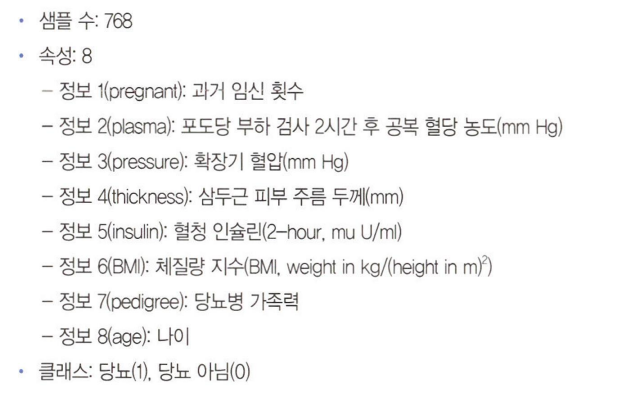

**1. 기본 환경 및 데이터 설정**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!git clone https://github.com/taehojo/data.git

df = pd.read_csv('./data/pima-indians-diabetes3.csv')

Cloning into 'data'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 21 (delta 3), reused 20 (delta 2), pack-reused 0
Unpacking objects: 100% (21/21), 460.93 KiB | 1.87 MiB/s, done.


**2. 전체 데이터 확인**

In [ ]:
df.head(5)  # 맨 위에 다섯 줄만 불러오기

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**3. 정상과 당뇨 환자가 각각 몇 명인지 조회**

In [ ]:
df['diabetes'].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

**4. 각 항목과 당뇨병의 상관관계 확인**

In [ ]:
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


**5. 그래프로 보기 쉽게 상관관계 표시**

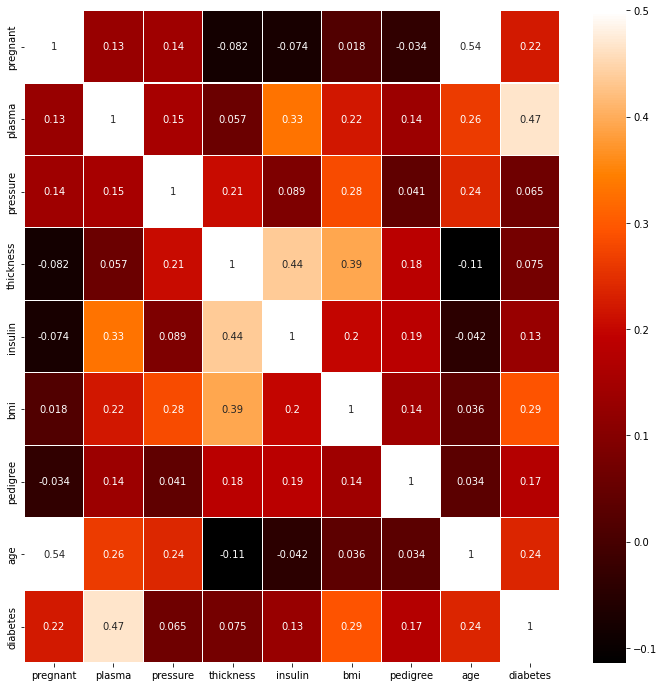

In [ ]:
colormap = plt.cm.gist_heat  # 그래프의 색상 구성 설정
plt.figure(figsize=(12,12))  # 그래프의 크기 설정

sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

>***==> plasma와 bmi가 가장 높은 상관관계 가짐을 확인할 수 있다.***




**6. plasma와 bmi만 따로 집중 분석**


> plasma를 기준으로 정상과 당뇨 여부 분포 파악

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


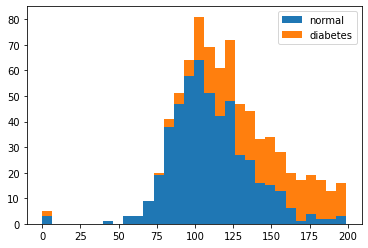

In [ ]:
plt.hist(x=[df.plasma[df.diabetes==0], df.plasma[df.diabetes==1]], bins=30, histtype='barstacked', label=['normal','diabetes'])  # bins -> x축을 몇 개의 구간으로 나눌 것인지
plt.legend()



> bmi를 기준으로 정상과 당뇨 여부 분포 파악



/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


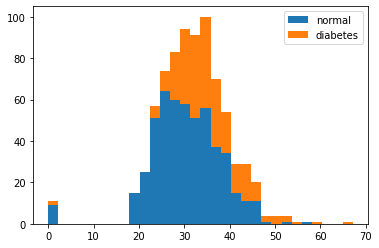

In [ ]:
plt.hist(x=[df.bmi[df.diabetes==0], df.bmi[df.diabetes==1]], bins=30, histtype='barstacked', label=['normal','diabetes'])
plt.legend()



> ***==> 여기까지가 데이터 전처리 과정***


**7. 피마 인디언의 당뇨병 예측 실행**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X = df.iloc[:,0:8]  # 세부 정보
y = df.iloc[:,8]  # 당뇨병 여부

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu', name='Dense_1'))  # 입력층
model.add(Dense(8, activation='relu', name='Dense_2'))
model.add(Dense(1, activation='sigmoid', name='Dense_3'))  # 출력층

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X, y, epochs=100, batch_size=5)

Epoch 1/100
154/154 [==============================] - 1s 2ms/step - loss: 3.9560 - accuracy: 0.4479
Epoch 2/100
154/154 [==============================] - 0s 2ms/step - loss: 0.8804 - accuracy: 0.5755
Epoch 3/100
154/154 [==============================] - 0s 2ms/step - loss: 0.7758 - accuracy: 0.6146
Epoch 4/100
154/154 [==============================] - 0s 2ms/step - loss: 0.7162 - accuracy: 0.6172
Epoch 5/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.6341
Epoch 6/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6634 - accuracy: 0.6380
Epoch 7/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6498 - accuracy: 0.6562
Epoch 8/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6402 - accuracy: 0.6589
Epoch 9/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6315 - accuracy: 0.6497
Epoch 10/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6302 - accura